# 전이 학습(Transfer learning)
- 한 문제에 학습된 결과를 다른 문제에 적용
- 학습 데이터가 부족한 분야의 모델 구축을 위해 데이터가 풍부한 분야에서 훈련된 모델을 재사용하는 학습 기법
- 전이학습에 사용되는 대량에 데이터셋으로 학습된 모델을 사전 학습 모델(Pre-trained Model)이라고 한다.
- 언어 모형은 별도의 y가 필요하지 않아서 대량의 데이터를 모으기 쉽다.



# BERT
- Bidirectional Encoder Representations from Transformers
- 트랜스포머에 인코더 부분만을 사용
- 양방향으로 정보를 처리하는 트랜스포머 기반의 언어 모델
- 다양한 종류의 자연어 처리 과제에서 전이학습을 쉽게 할수 있도록 설계

## BERT의 입력

- 특수 토큰
    - [CLS]: 문장 분류를 위한 특수 토큰
    - [SEP]: 문장 구분을 위한 토큰. 각 문장의 끝에 붙임
- token embedding: 토큰의 임베딩
- segment embedding: 문장을 구분하기 위한 임베딩
- position embedding: 단어 위치를 나타내는 임베딩

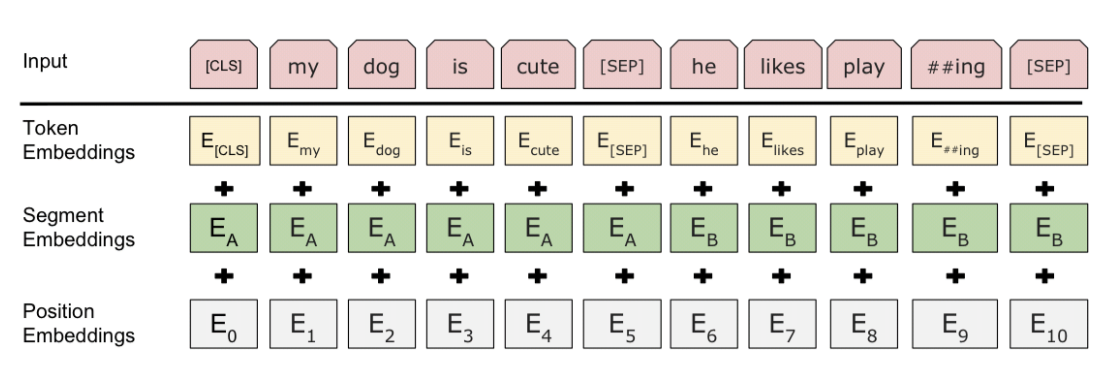

## BERT의 사전 학습
- 단어를 가리고 예측(Masked Language Model)
- 두 문장의 관계를 예측(Next Sentence Prediction)

# Transformers 라이브러리
- Hugging Face사의 딥러닝 라이브러리
- 트랜스포머를 기반으로 하는 다양한 모델과 학습 스크립트를 구현해 놓은 라이브러리
- https://huggingface.co/


In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.6 MB/s 
     |████████████████████████████████| 6.6 MB 39.9 MB/s 
     |████████████████████████████████| 163 kB 53.2 MB/s 


## pipeline 이용해서 예측


In [3]:
from transformers import pipeline # 입,출력 과정을 pipeline 이라고 함

### sentiment-analysis


In [4]:
classifier = pipeline(
    "sentiment-analysis", model="sangrimlee/bert-base-multilingual-cased-nsmc"
)

Downloading:   0%|          | 0.00/932 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/712M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/297 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [5]:
classifier('코딩은 정말 어렵다')

[{'label': 'negative', 'score': 0.9145733118057251}]

In [6]:
classifier('나는 오늘도 열심히 딥러닝 공부를 했다')

[{'label': 'positive', 'score': 0.9119041562080383}]

In [26]:
classifier("꺼져")

[{'label': 'negative', 'score': 0.9937845468521118}]

- 파이프라인 저장

In [7]:
classifier.save_pretrained("sentiment_pipeline")

- 불러오기

In [8]:
classifier = pipeline("sentiment-analysis", model = "sentiment_pipeline")
classifier('오늘 너무 행복하다')

[{'label': 'positive', 'score': 0.9830362200737}]

### fill-mask


In [9]:
fill_mask = pipeline("fill-mask", model = "klue/bert-base")

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [10]:
fill_mask("오늘 저녁은 [MASK] 먹자",top_k=10) # top_k=10 가장 높은 확률 10개

[{'score': 0.07854149490594864,
  'token': 677,
  'token_str': '꼭',
  'sequence': '오늘 저녁은 꼭 먹자'},
 {'score': 0.06891655921936035,
  'token': 1521,
  'token_str': '잘',
  'sequence': '오늘 저녁은 잘 먹자'},
 {'score': 0.06734155118465424,
  'token': 23698,
  'token_str': '이걸로',
  'sequence': '오늘 저녁은 이걸로 먹자'},
 {'score': 0.0492863655090332,
  'token': 1,
  'token_str': '[UNK]',
  'sequence': '오늘 저녁은 먹자'},
 {'score': 0.037069182842969894,
  'token': 1097,
  'token_str': '뭐',
  'sequence': '오늘 저녁은 뭐 먹자'},
 {'score': 0.03490210324525833,
  'token': 1099,
  'token_str': '뭘',
  'sequence': '오늘 저녁은 뭘 먹자'},
 {'score': 0.03136727586388588,
  'token': 3737,
  'token_str': '이렇게',
  'sequence': '오늘 저녁은 이렇게 먹자'},
 {'score': 0.02197464182972908,
  'token': 10725,
  'token_str': '떡볶이',
  'sequence': '오늘 저녁은 떡볶이 먹자'},
 {'score': 0.020356040447950363,
  'token': 4239,
  'token_str': '제대로',
  'sequence': '오늘 저녁은 제대로 먹자'},
 {'score': 0.019041113555431366,
  'token': 3842,
  'token_str': '어떻게',
  'sequence': '오늘 저녁

### question-answering



In [11]:
question_answering = pipeline("question-answering",model= "ainize/klue-bert-base-mrc")

Downloading:   0%|          | 0.00/609 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [12]:
question = "대한민국의 수도는?"
context = """
서울특별시는 대한민국의 수도, 최고(最古) 도시, 최대 도시다.[19]

지방자치법의 특별법[20]으로 법률상 대한민국 제1의 도시로 규정되어 있다. 현재 대한민국 유일 특별시이며, 수장인 서울특별시장은 대한민국의 광역자치단체장 중 유일하게 장관급 대우를 받으며 국무회의 참여권 및 발언권이 있다.[21][22] 서울은 한국 제2의 도시인 부산보다도 인구가 약 3배 더 많은 명실상부한 한반도의 종주도시이다.

역사적으로도 백제, 조선, 대한제국의 고도이자 현 대한민국의 수도로서 중요성이 높다. 기원전 18년 백제가 현 송파·강동 지역에 도읍을 정한 후 492년간 한성백제 시대가 이어졌다. 이후 475년 고구려가 한성을 함락하였는데, 북쪽에 기반을 둔 국가인 고구려는 기존 백제의 한성에서 북쪽으로 한강을 건너 현 광진·성동·구리 일대를 거점으로 삼아 고구려의 북한산군 남평양으로 지정했고, 이후 서울은 강북 지역을 중심으로 발전하였다. 이후 553년 신라가 이 지역을 차지하여 신라의 한산주 한양군이 되었다. 이후 고려시대에는 약 250년간[23] 개경 이남의 남경이었다. 조선시대에는 510년 동안[24] 조선 및 대한제국의 수도 한성부였고, 이어 70여년간[25] 대한민국의 수도인 서울로서 지위를 차지하는 도시로 한국사에서 도합 1070여년간 수도로서 기능을 하였고 부수도 기간까지 합치면 1300년이 넘는 유구한 역사의 고도이다.[26]
"""

In [13]:
question_answering(question,context)

{'score': 0.641891360282898, 'start': 1, 'end': 7, 'answer': '서울특별시는'}

# GPT(Generative Pre-Training)
- OpenAI에서 개발한 트랜스포머 기반의 언어 생성모델
- 트랜스포머에 디코더만 사용


In [14]:
text_generation = pipeline("text-generation",model= "skt/kogpt2-base-v2") 

Downloading:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/513M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [15]:
text_generation("딥러닝")

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': '딥러닝, 인공지능 등 지능의 핵심기술들이 접목되고, IT와 인공지능이 융합되면서 신산업분야에서 새로운 가치를 창출할 수 있는 기회가 마련됐지만 새로운 기술에 대응해 사업추진전략이 근본적으로 실패하는 경우가 종종'}]

In [17]:
text_generation("사업추진전략이 근본적으로 실패하는 경우가 종종",max_new_tokens=500)

[{'generated_text': '사업추진전략이 근본적으로 실패하는 경우가 종종 있으며, 이것이 바로 우리 정부의 \'과단성\' 때문이 아닌가 한다.\n지난 2005년 1월, 당시 국민중심당이 국회 정무위원회 전체회의 문턱을 넘지 못했다.\n국민중심당은 이 문제를 놓고 상임위원장 배분에 당력을 집중했다.\n이런 상태에서 정무위원회 위원장에서 물러나면서 국회를 한 번도 가보지 않은 채 이 문제에 집중한 것은 \'과단성\' 때문이었다.\n특히 정무위 의원들과 의원 간의 갈등과 고성이 계속되고 있는 가운데 회의장은 파행을 거듭하고 있었다.\n오후 4시가 되서야 첫 질의가 시작됐다.\n"여당이 과반수를 차지하는 민주당의 법안 처리로 본회의에서 처리하지 못해 유감"이었다며 원 원내대표가 사퇴를 선언하자 바로 다음날 열린 민주당 의원총회에서 여당의 \'위법상임위 기피\' 의결에 항의하며 농성을 벌였다.\n결국 정무위 위원장과 소속 의원들이 농성을 접으려 했으나 박 대표는 의원총회를 소집하고 원 원내대표에게 사퇴를 종용한 뒤 퇴장했다.\n여당은 더 이상 협상의 여지라도 남겨두지 말고 이날 국회를 통해 민주당의 법안 처리를 \'위헌\'이라고 주장하며 한나라당을 향해 법적 조치를 취해줄 것을 요구했다.\n여당은 이에 대해 \'해당 상임위는 여당이 차지하고 있는데, 이 문제를 정치적으로 이용하는 듯한 행태는 용납할 수 없다\'며 법안 직권상정에 반대한 바 있다.\n이런 와중에 국민중심당은 지난 2004년 6월, 국회 본회의에서 상임위원장 배분에 앞서 상임위별로 법안 직권 상정을 주장했다.\n한나라당은 법안 직권상정을 통한 의사일정을 일방적으로 강행했다.\n결국 민주당 의원들이 한나라당의 점거 농성을 물리적으로 저지한 것이다.\n결국 이후 여야 간 협상 교착으로 여야 간 갈등의 골은 점점 깊어졌고, 급기야 10월 8일 정쟁을 위한 야당의 국회 외통위 소집 요구까지 관철시켜 버렸다.\n법안 직권상정은 헌법재판소에서 위헌과 부당성을 결정하면서 사실상 무력화된 것이다.\n한국의 국